Chapter 3

In [7]:
import numpy as np
import pandas as pd
from matplotlib.pyplot import subplots
from scipy import stats

In [8]:
Advertising = pd.read_csv('data/Advertising.csv')
Advertising = Advertising[['TV','radio','newspaper','sales']]

In [9]:
y = Advertising[['sales']]
n = max(y.shape)
x = Advertising[['TV']]
X = np.hstack((np.ones((n,1)),x))
beta = np.linalg.lstsq(X,y,rcond=None)[0]
yhat = np.matmul(X,beta)

/home/jake/.local/lib/python3.10/site-packages/pandas/plotting/_matplotlib/core.py:1114: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  scatter = ax.scatter(


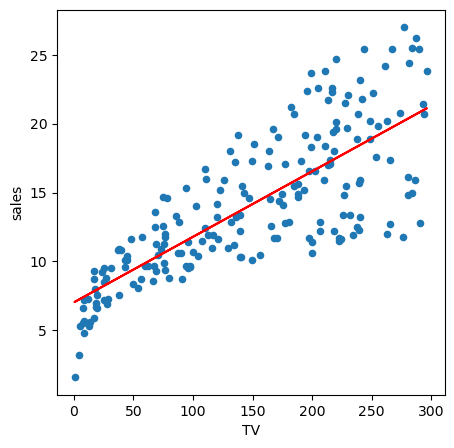

In [10]:
fig, axes = subplots(figsize=(5,5))
ax = Advertising.plot.scatter('TV', 'sales',ax=axes);
ax.plot(Advertising['TV'],yhat,'r');

LinregressResult(slope=0.0475366404330197, intercept=7.032593549127702, rvalue=0.7822244248616063, pvalue=1.4673897001948012e-42, stderr=0.0026906071877968703, intercept_stderr=0.4578429402734785)

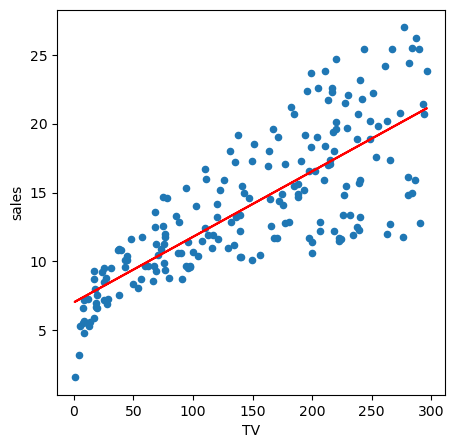

In [11]:
y = Advertising['sales']
x = Advertising['TV']
result = stats.linregress(x,y)
yhat=result.slope*x+result.intercept
fig, axes = subplots(figsize=(5,5))
ax = Advertising.plot.scatter('TV', 'sales',ax=axes);
ax.plot(Advertising['TV'],yhat,'r');
result

In [12]:
# 95% confidence intervals for beta0 and beta1 
print('95% confidence interval for the slope: ',[result.slope-2*result.stderr,result.slope+2*result.stderr])
print('95% confidence interval for the intercept: ',[result.intercept-2*result.intercept_stderr,result.intercept+2*result.intercept_stderr])
# t values for beta0 and beta1
print('t-values: ',[result.slope/result.stderr,result.intercept/result.intercept_stderr])
# R^2 value
print('R-squared value: ',result.rvalue**2)

95% confidence interval for the slope:  [0.04215542605742596, 0.05291785480861344]
95% confidence interval for the intercept:  [6.116907668580745, 7.948279429674659]
t-values:  [17.66762560087553, 15.360275174117563]
R-squared value:  0.6118750508500707


Multiple linear regression

In [13]:
y = Advertising[['sales']]
n = max(y.shape)
X = Advertising[['TV','radio','newspaper']]
p = min(X.shape)
X = np.hstack((np.ones((n,1)),X))
beta = np.linalg.lstsq(X,y,rcond=None)[0]
yhat = np.matmul(X,beta)

In [14]:
# Compute the standard errors, t-values, and the associated p-values
RSS = np.linalg.norm(y-yhat)**2
RSE = (RSS/(n-p-1))**(1/2)
StdErrs = np.diag(RSE**2*np.linalg.inv(np.matmul(X.transpose(),X)))**(1/2)
print('standard errors: ', StdErrs)
tvals = np.divide(beta.transpose(),StdErrs)
print('t-values: ', tvals)
pvals = 2*(1-stats.t.cdf(np.absolute(tvals),n-p-1,loc=0,scale=1))
print('p-values: ',pvals)

standard errors:  [0.31190824 0.0013949  0.00861123 0.00587101]
t-values:  [[ 9.42228844 32.80862443 21.89349606 -0.17671459]]
p-values:  [[0.         0.         0.         0.85991505]]


In [15]:
Advertising.corr()

,TV,radio,newspaper,sales
TV,1.000000,0.054809,0.056648,0.782224
radio,0.054809,1.000000,0.354104,0.576223
newspaper,0.056648,0.354104,1.000000,0.228299
sales,0.782224,0.576223,0.228299,1.000000


In [16]:
TSS = np.linalg.norm(y-y.mean())**2
R2 = (TSS-RSS)/TSS
print('R^2: ',R2)
F = ((TSS-RSS)/p)/(RSS/(n-p-1))
print('F-value: ',F)
pval = 1-stats.f.cdf(F,p,n-p-1)
print('p-value: ',pval)

R^2:  0.8972106381789521
F-value:  570.270703659094
p-value:  1.1102230246251565e-16


In [17]:
# Compute F-statistic for removing the resulting single variable from the model F = t^2 (see footnote on p. 85)
F = tvals**2
pvals_F = 1-stats.f.cdf(F,1,n-p-1)
print('p-values for F stat, one varible removed: ',pvals_F)

p-values for F stat, one varible removed:  [[1.11022302e-16 1.11022302e-16 1.11022302e-16 8.59915050e-01]]


In [18]:
# Recompute statistics with X3=newspaper removed
y = Advertising[['sales']]
n = max(y.shape)
X = Advertising[['TV','radio']]
p = min(X.shape)
X = np.hstack((np.ones((n,1)),X))
beta = np.linalg.lstsq(X,y,rcond=None)[0]
yhat = np.matmul(X,beta)
RSS = np.linalg.norm(y-yhat)**2
RSE = (RSS/(n-p-1))**(1/2)
StdErrs = np.diag(RSE**2*np.linalg.inv(np.matmul(X.transpose(),X)))**(1/2)
print('standard errors: ', StdErrs)
tvals = np.divide(beta.transpose(),StdErrs)
print('t-values: ', tvals)
pvals = 2*(1-stats.t.cdf(np.absolute(tvals),n-p-1,loc=0,scale=1))
print('p-values: ',pvals)
TSS = np.linalg.norm(y-y.mean())**2
R2 = (TSS-RSS)/TSS
print('R^2: ',R2)

standard errors:  [0.29448968 0.00139036 0.00803997]
t-values:  [[ 9.91919285 32.90870826 23.38244601]]
p-values:  [[0. 0. 0.]]
R^2:  0.8971942610828956


Next, on to the Credit.csv data set

In [20]:
Credit = pd.read_csv('data/Credit.csv')
n = max(Credit.shape)
Credit

,Income,Limit,Rating,Cards,Age,Education,Own,Student,Married,Region,Balance
0,14.891,3606,283,2,34,11,No,No,Yes,South,333
1,106.025,6645,483,3,82,15,Yes,Yes,Yes,West,903
2,104.593,7075,514,4,71,11,No,No,No,West,580
3,148.924,9504,681,3,36,11,Yes,No,No,West,964
4,55.882,4897,357,2,68,16,No,No,Yes,South,331
...,...,...,...,...,...,...,...,...,...,...,...
395,12.096,4100,307,3,32,13,No,No,Yes,South,560
396,13.364,3838,296,5,65,17,No,No,No,East,480
397,57.872,4171,321,5,67,12,Yes,No,Yes,South,138
398,37.728,2525,192,1,44,13,No,No,Yes,South,0


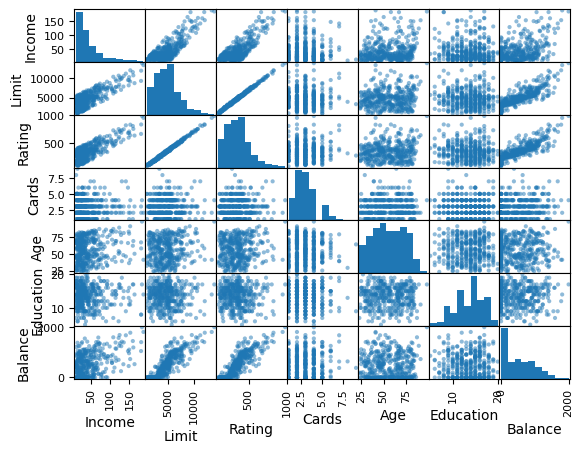

In [ ]:
pd.plotting.scatter_matrix(Credit);

See if the amount of credit card debt you have is statistically different whether you own a home or not.

In [ ]:
y = Credit[['Balance']]
X = np.ones((n,2))
indx_own = Credit['Own']=='Yes'
# beta_1 = 0 for the non-homeowners.
X[~indx_own,1]=0
beta = np.linalg.lstsq(X,y,rcond=None)[0]
print('mean balances : ', beta.transpose())
yhat = np.matmul(X,beta)
RSS = np.linalg.norm(y-yhat)**2
RSE = (RSS/(n-p-1))**(1/2)
StdErrs = np.diag(RSE**2*np.linalg.inv(np.matmul(X.transpose(),X)))**(1/2)
print('standard errors: ', StdErrs)
tvals = np.divide(beta.transpose(),StdErrs)
print('t-values: ', tvals)
pvals = 2*(1-stats.t.cdf(np.absolute(tvals),n-p-1,loc=0,scale=1))
print('p-values: ',pvals)

mean balances :  [[509.80310881  19.73312308]]
standard errors:  [33.16977357 46.10917266]
t-values:  [[15.36950826  0.42796524]]
p-values:  [[0.         0.66890849]]


See if the amount of credit card debt you have is statistically different depending upon the region you live in.

In [ ]:
indx_west = Credit['Region']=='West'
indx_south = Credit['Region']=='South'
X = np.ones((n,3))
X[~indx_south,1]=0
X[~indx_west,2]=0
beta = np.linalg.lstsq(X,y,rcond=None)[0]
print('mean balances : ', beta.transpose())
yhat = np.matmul(X,beta)
RSS = np.linalg.norm(y-yhat)**2
RSE = (RSS/(n-p-1))**(1/2)
StdErrs = np.diag(RSE**2*np.linalg.inv(np.matmul(X.transpose(),X)))**(1/2)
print('standard errors: ', StdErrs)
tvals = np.divide(beta.transpose(),StdErrs)
print('t-values: ', tvals)
pvals = 2*(1-stats.t.cdf(np.absolute(tvals),n-p-1,loc=0,scale=1))
print('p-values: ',pvals)

mean balances :  [[531.         -12.50251256 -18.68627451]]
standard errors:  [46.37712929 56.75256    65.10312049]
t-values:  [[11.44960907 -0.22029865 -0.28702579]]
p-values:  [[0.        0.8257521 0.7742427]]


It does not appear that credit card debt is dependent upon region in which you live. Let's do an F-test to verify this.

In [ ]:
TSS = np.linalg.norm(y-y.mean())**2
p = 2;
F = ((TSS-RSS)/p)/(RSS/(n-p-1))
print('F-value: ',F)
pval = 1-stats.f.cdf(F,p,n-p-1)
print('p-value: ',pval)

F-value:  77.14992049761588
p-value:  1.1102230246251565e-16


Thus we fail to reject the null hypothesis, that beta1 and beta2 are both 0.

Let's return to the sales problem and look at the model including the interaction term $\beta_3 X_1 X_2$

In [ ]:
y = Advertising[['sales']]
n = max(y.shape)
Advertising['TV*radio'] = Advertising.TV*Advertising.radio
X = Advertising[['TV','radio','TV*radio']]
p = min(X.shape)
X = np.hstack((np.ones((n,1)),X))
beta = np.linalg.lstsq(X,y,rcond=None)[0]
print('beta_hat = ',beta.transpose())
yhat = np.matmul(X,beta)
RSS = np.linalg.norm(y-yhat)**2
RSE = (RSS/(n-p-1))**(1/2)
StdErrs = np.diag(RSE**2*np.linalg.inv(np.matmul(X.transpose(),X)))**(1/2)
print('standard errors: ', StdErrs)
tvals = np.divide(beta.transpose(),StdErrs)
print('t-values: ', tvals)
pvals = 2*(1-stats.t.cdf(np.absolute(tvals),n-p-1,loc=0,scale=1))
print('p-values: ',pvals)
TSS = np.linalg.norm(y-y.mean())**2
R2 = (TSS-RSS)/TSS
print('R^2: ',R2)

beta_hat =  [[6.75022020e+00 1.91010738e-02 2.88603399e-02 1.08649470e-03]]
standard errors:  [2.47871370e-01 1.50414551e-03 8.90527286e-03 5.24203958e-05]
t-values:  [[27.23275465 12.69895347  3.24081478 20.72656418]]
p-values:  [[0.         0.         0.00140046 0.        ]]
R^2:  0.9677905498482523


This shows that the interaction term $X_1 X_2$ is signficant and so should be in the model. Note that the R^2 value increased from .897 to 0.968, which is significant.

Back to the Credit data set. This time will see how income effects credit card debt based on whether you are a student or not.

In [ ]:
y = Credit[['Balance']]
n = y.shape[0]
p = 3
x0 = np.ones((n,1))
x1 = Credit[['Income']]
indx_student = Credit['Student']=='Yes'
x2 = np.ones((n,1))
x2[~indx_student]=0
x3 = np.multiply(x1,x2)
X = np.hstack((x0,x1,x2,x3))
beta = np.linalg.lstsq(X,y,rcond=None)[0]
print('mean balances : ', beta.transpose())
yhat = np.matmul(X,beta)
RSS = np.linalg.norm(y-yhat)**2
RSE = (RSS/(n-p-1))**(1/2)
StdErrs = np.diag(RSE**2*np.linalg.inv(np.matmul(X.transpose(),X)))**(1/2)
print('standard errors: ', StdErrs)
tvals = np.divide(beta.transpose(),StdErrs)
print('t-values: ', tvals)
pvals = 2*(1-stats.t.cdf(np.absolute(tvals),n-p-1,loc=0,scale=1))
print('p-values: ',pvals)

mean balances :  [[200.62315295   6.21816874 476.67584321  -1.99915087]]
standard errors:  [ 33.69837058   0.59209358 104.35122347   1.73125114]
t-values:  [[ 5.95349714 10.5020034   4.56799477 -1.15474342]]
p-values:  [[5.78965809e-09 0.00000000e+00 6.58609508e-06 2.48891851e-01]]


The p-value for the t-test for $\beta_3$ suggests that we may not be able to reject the null hypothesis, that $\beta_3=0$.

Nonlinear relationships

In [38]:
Auto = pd.read_csv('data/Auto.csv')
Auto

,mpg,cylinders,displacement,horsepower,weight,acceleration,year,origin,name
0,18.0,8,307.0,130,3504,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165,3693,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150,3436,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150,3433,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140,3449,10.5,70,1,ford torino
5,15.0,8,429.0,198,4341,10.0,70,1,ford galaxie 500
6,14.0,8,454.0,220,4354,9.0,70,1,chevrolet impala
7,14.0,8,440.0,215,4312,8.5,70,1,plymouth fury iii
8,14.0,8,455.0,225,4425,10.0,70,1,pontiac catalina
9,15.0,8,390.0,190,3850,8.5,70,1,amc ambassador dpl


In [44]:
Auto['horsepower'] = pd.to_numeric(Auto['horsepower'], errors='coerce')
Auto.isnull().sum()
Auto = Auto.dropna()

In [43]:
# show the null values from horsepower
Auto[Auto['horsepower'].isnull()]

,mpg,cylinders,displacement,horsepower,weight,acceleration,year,origin,name
32,25.0,4,98.0,NaN,2046,19.0,71,1,ford pinto
126,21.0,6,200.0,NaN,2875,17.0,74,1,ford maverick
330,40.9,4,85.0,NaN,1835,17.3,80,2,renault lecar deluxe
336,23.6,4,140.0,NaN,2905,14.3,80,1,ford mustang cobra
354,34.5,4,100.0,NaN,2320,15.8,81,2,renault 18i


Try fitting a quadratice model: $y=\beta_0+\beta_1 x+\beta_2 x^2+\epsilon$

In [45]:
y = Auto[['mpg']]
n = y.shape[0]
x0 = np.ones((n,1))
x1 = Auto[['horsepower']]
x2 = Auto[['horsepower']]**2
X = np.hstack((x0,x1,x2))
beta = np.linalg.lstsq(X,y,rcond=None)[0]
print('mean balances : ', beta.transpose())
yhat = np.matmul(X,beta)
RSS = np.linalg.norm(y-yhat)**2
RSE = (RSS/(n-p-1))**(1/2)
StdErrs = np.diag(RSE**2*np.linalg.inv(np.matmul(X.transpose(),X)))**(1/2)
print('standard errors: ', StdErrs)
tvals = np.divide(beta.transpose(),StdErrs)
print('t-values: ', tvals)
pvals = 2*(1-stats.t.cdf(np.absolute(tvals),n-p-1,loc=0,scale=1))
print('p-values: ',pvals)

mean balances :  [[ 5.69000997e+01 -4.66189630e-01  1.23053610e-03]]
standard errors:  [1.80042681e+00 3.11246171e-02 1.22075863e-04]
t-values:  [[ 31.60367281 -14.97816433  10.08009342]]
p-values:  [[0. 0. 0.]]


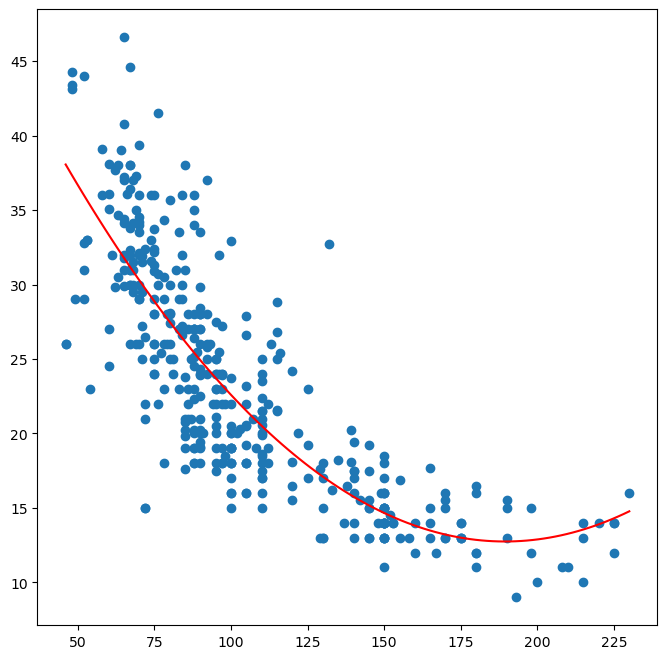

In [46]:
y = Auto[['mpg']]
x1 = Auto[['horsepower']]
fig, ax = subplots(figsize=(8,8))
ax.plot(x1,y,'o')
x1_grid = np.linspace(x1.min(),x1.max(),100)
yhat_grid = beta[0]+beta[1]*x1_grid+beta[2]*x1_grid**2
ax.plot(x1_grid,yhat_grid,'r')

We don't do much better if we increase to cubic, quartic, etc.

Colinearity

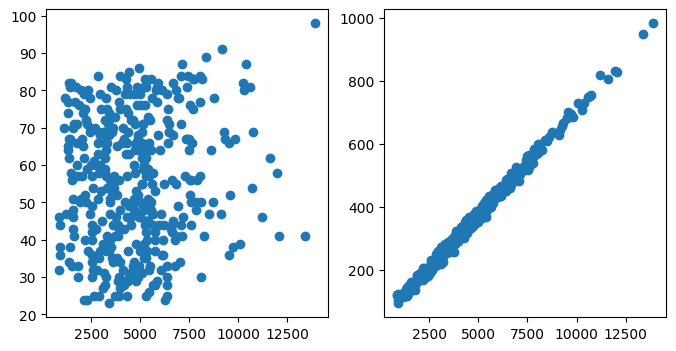

In [ ]:
fig, ax = subplots(ncols=2, figsize=(8,4))
ax[0].plot(Credit['Limit'],Credit['Age'],'o')
ax[1].plot(Credit['Limit'],Credit['Rating'],'o')